In [2]:
# Encoding  --> Transform our categorical data into numerical data
# because our machine can only understand math not a single character.

In [3]:
# (1) LabelEncoding

# Apply on isngle column -> column(sub1,sub2,...,subn)  -. own(0,1,2)

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('Day028_Sample_data_covid_toy.csv')

In [6]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [7]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer


In [9]:
si=SimpleImputer()

In [10]:
df['fever']=si.fit_transform(df[['fever']])

In [11]:
df.isna().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [12]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb=LabelEncoder()


In [15]:
df['gender']=lb.fit_transform(df['gender'])
df['cough']=lb.fit_transform(df['cough'])
df['city']=lb.fit_transform(df['city'])
df['has_covid']=lb.fit_transform(df['has_covid'])

In [16]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


In [17]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.head()

,age,gender,fever,cough,city
55,81,0,101.0,0,3
88,5,0,100.0,0,2
26,19,0,100.0,0,2
42,27,1,100.0,0,1
69,73,0,103.0,0,1


In [21]:
np.round(x_train.describe(),2)

,age,gender,fever,cough,city
count,80.00,80.00,80.00,80.00,80.00
mean,42.91,0.41,100.98,0.40,1.30
std,24.47,0.50,1.93,0.49,1.12
min,5.00,0.00,98.00,0.00,0.00
25%,20.00,0.00,100.00,0.00,0.00
50%,42.00,0.00,101.00,0.00,1.00
75%,65.00,1.00,102.00,1.00,2.00
max,84.00,1.00,104.00,1.00,3.00


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mn=MinMaxScaler()

In [24]:
x_train_mn=mn.fit_transform(x_train)

In [25]:
x_train_new=pd.DataFrame(x_train_mn,columns=x_train.columns)

In [26]:
np.round(x_train_new.describe(),2)

,age,gender,fever,cough,city
count,80.00,80.00,80.00,80.00,80.00
mean,0.48,0.41,0.50,0.40,0.43
std,0.31,0.50,0.32,0.49,0.37
min,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.00,0.33,0.00,0.00
50%,0.47,0.00,0.50,0.00,0.33
75%,0.76,1.00,0.67,1.00,0.67
max,1.00,1.00,1.00,1.00,1.00


In [27]:
# Tips dataset

In [28]:
df=pd.read_csv('Day028_tips.csv')

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lb=LabelEncoder()

In [33]:
df.columns.value_counts()

total_bill    1
tip           1
sex           1
smoker        1
day           1
time          1
size          1
Name: count, dtype: int64

In [34]:
df['sex']=lb.fit_transform(df['sex'])
df['smoker']=lb.fit_transform(df['smoker'])
df['day']=lb.fit_transform(df['day'])
df['time']=lb.fit_transform(df['time'])


In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [36]:
x=df.drop(columns=['total_bill'])
y=df['total_bill']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [39]:
x_train.head()

,tip,sex,smoker,day,time,size
49,3.00,1,0,2,0,2
25,2.34,1,0,1,0,4
56,3.00,1,1,1,0,4
171,3.16,1,1,1,0,2
3,3.31,1,0,2,0,2


In [40]:
np.round(x_train.describe(),2)

,tip,sex,smoker,day,time,size
count,195.00,195.00,195.00,195.00,195.00,195.00
mean,2.99,0.68,0.41,1.71,0.27,2.55
std,1.42,0.47,0.49,0.94,0.45,0.95
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,0.00,2.00
50%,2.83,1.00,0.00,2.00,0.00,2.00
75%,3.52,1.00,1.00,2.50,1.00,3.00
max,10.00,1.00,1.00,3.00,1.00,6.00


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mn=MinMaxScaler()

In [43]:
x_train_mn=mn.fit_transform(x_train)

In [44]:
x_train_new=pd.DataFrame(x_train_mn,columns=x_train.columns)

In [45]:
np.round(x_train_new.describe(),2)

,tip,sex,smoker,day,time,size
count,195.00,195.00,195.00,195.00,195.00,195.00
mean,0.22,0.68,0.41,0.57,0.27,0.31
std,0.16,0.47,0.49,0.31,0.45,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.11,0.00,0.00,0.33,0.00,0.20
50%,0.20,1.00,0.00,0.67,0.00,0.20
75%,0.28,1.00,1.00,0.83,1.00,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00


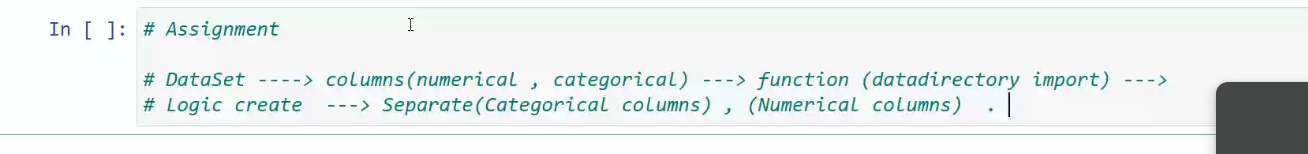